In [1]:

%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

# Join matrix profile analysis of delta 18O & Ca2+  proxy records

## Data

In [2]:
d18=pd.read_csv("d18.txt",header=None,sep=" ")
ca=pd.read_csv("ca2+.txt",header=None,sep=" ")
caS=pd.read_csv("caShift.txt",header=None,sep=" ")
caT=pd.read_csv("caTrim.txt",header=None,sep=" ")

## Join matrix profile - delta18O & Ca2+ series

In [3]:
m = 125
d18ca_mp = stumpy.stump(T_A = d18.iloc[:,1].values,
                        m = m,
                        T_B = ca.iloc[:,1].values,
                        ignore_trivial = False)

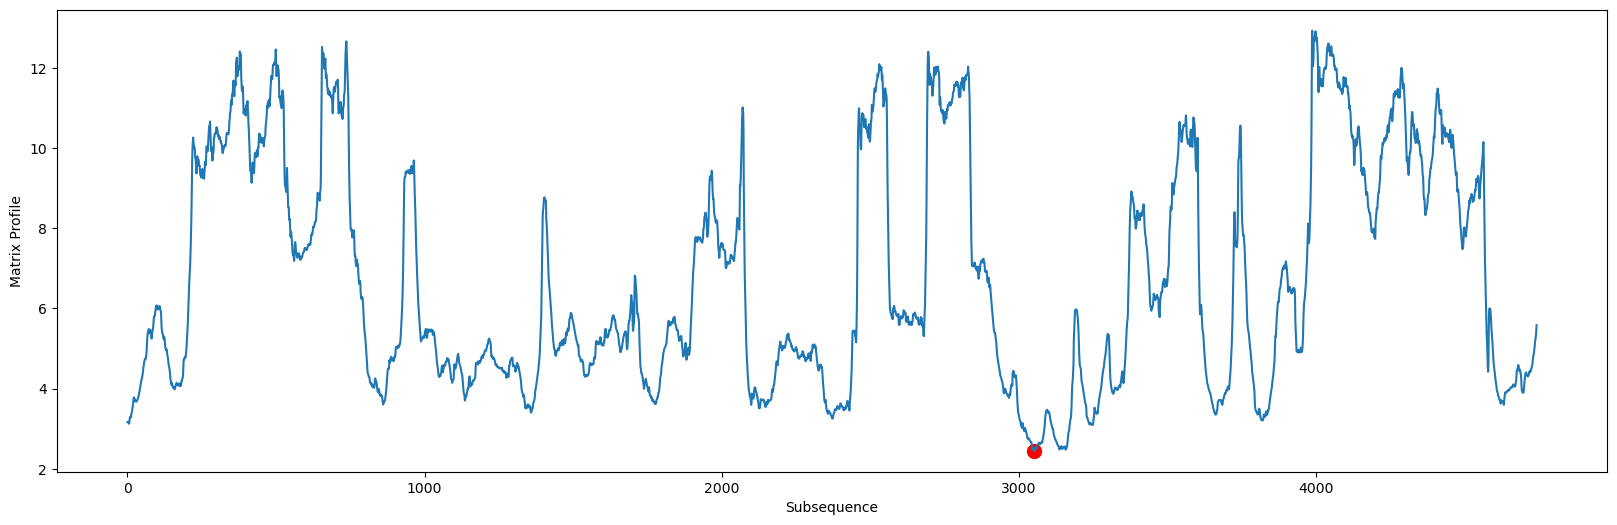

In [4]:
d18ca_motif_index = d18ca_mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(d18ca_motif_index,
               d18ca_mp[d18ca_motif_index, 0],
               c='red',
               s=100)

plt.plot(d18ca_mp[:,0])

In [5]:
# Write matrix profile to external file
pd.DataFrame(d18ca_mp,columns=["MP","I","IL","IR"]).to_csv("join_mp.csv" , sep=",", index=False)


In [6]:
d18_motif_index = d18ca_mp[:, 0].argmin()
print(f'The motif is located at index {d18_motif_index} of "D18"')

The motif is located at index 3051 of "D18"


In [7]:
ca_motif_index = d18ca_mp[d18_motif_index, 1]
print(f'The motif is located at index {ca_motif_index} of "Ca2+"')

The motif is located at index 3051 of "Ca2+"


In [8]:
join_mtf=[d18_motif_index,ca_motif_index]

In [9]:
pd.DataFrame(d18ca_mp[join_mtf][:,0:2]).to_csv("mtf_join.csv", sep=",", index=False)

## Join matrix profile - delta18O & shifted Ca2+ series

In [10]:
m = 125
d18caS_mp = stumpy.stump(T_A =  d18.iloc[:,1].values,
                        m = m,
                        T_B = caS.iloc[:,1].values,
                        ignore_trivial = False)

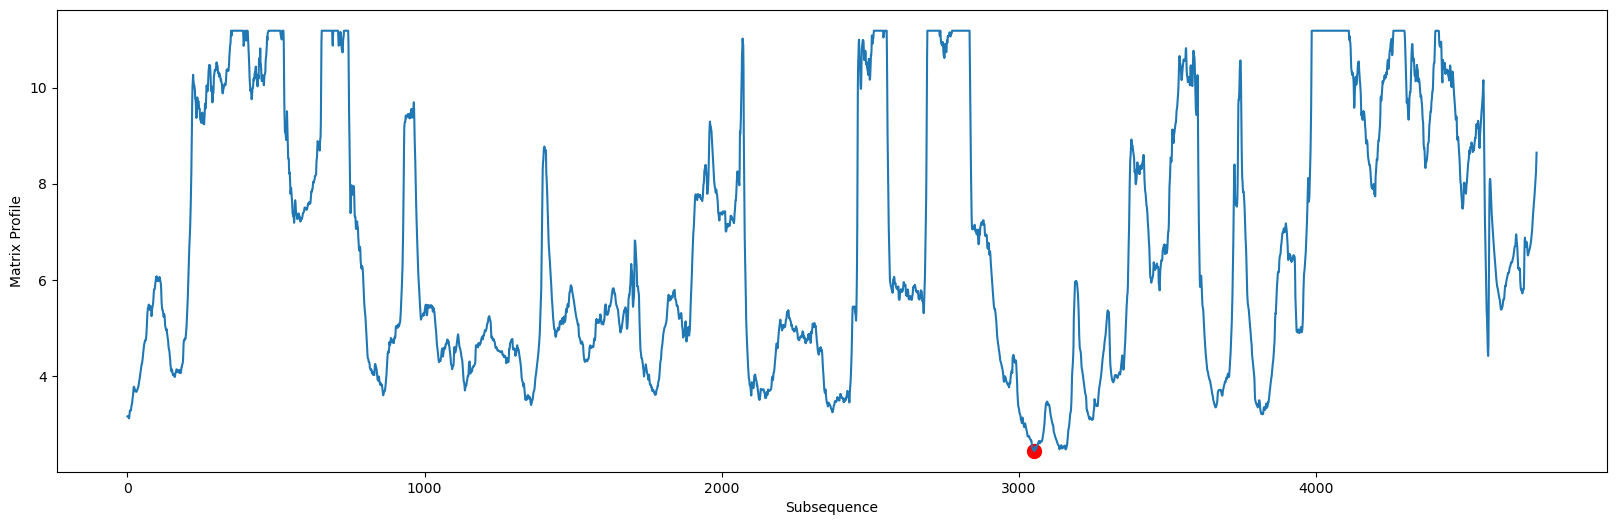

In [11]:
d18caS_motif_index = d18caS_mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(d18caS_motif_index,
               d18caS_mp[d18ca_motif_index, 0],
               c='red',
               s=100)

plt.plot(d18caS_mp[:,0])


In [12]:
# Write matrix profile to external file
pd.DataFrame(d18caS_mp,columns=["MP","I","IL","IR"]).to_csv("join_mp_shift.csv" , sep=",", index=False)

In [13]:
d18_motif_index = d18caS_mp[:, 0].argmin()
print(f'The motif is located at index {d18_motif_index} of "D18"')

The motif is located at index 3051 of "D18"


In [14]:
caS_motif_index = d18caS_mp[d18_motif_index, 1]
print(f'The motif is located at index {caS_motif_index} of "Ca2+"')

The motif is located at index 3551 of "Ca2+"


In [15]:
join_mtf_S=[d18_motif_index,caS_motif_index]
join_mtf_S

[3051, 3551]

In [16]:
d18caS_mp[join_mtf_S]

array([[2.4496574550206547, 3551, -1, -1],
       [10.290290668161456, 1638, -1, -1]], dtype=object)

In [17]:
d18caS_mp[d18_motif_index, 1]

3551

In [18]:
pd.DataFrame(d18caS_mp[join_mtf_S][:,0:2]).to_csv("mtf_join_shift.csv", sep=",", index=False)

## Join matrix profile - delta18O & trimmed Ca2+ series

In [19]:
m = 125
d18caT_mp = stumpy.stump(T_A =  d18.iloc[:,1].values,
                        m = m,
                        T_B = caT.iloc[:,1].values,
                        ignore_trivial = False)

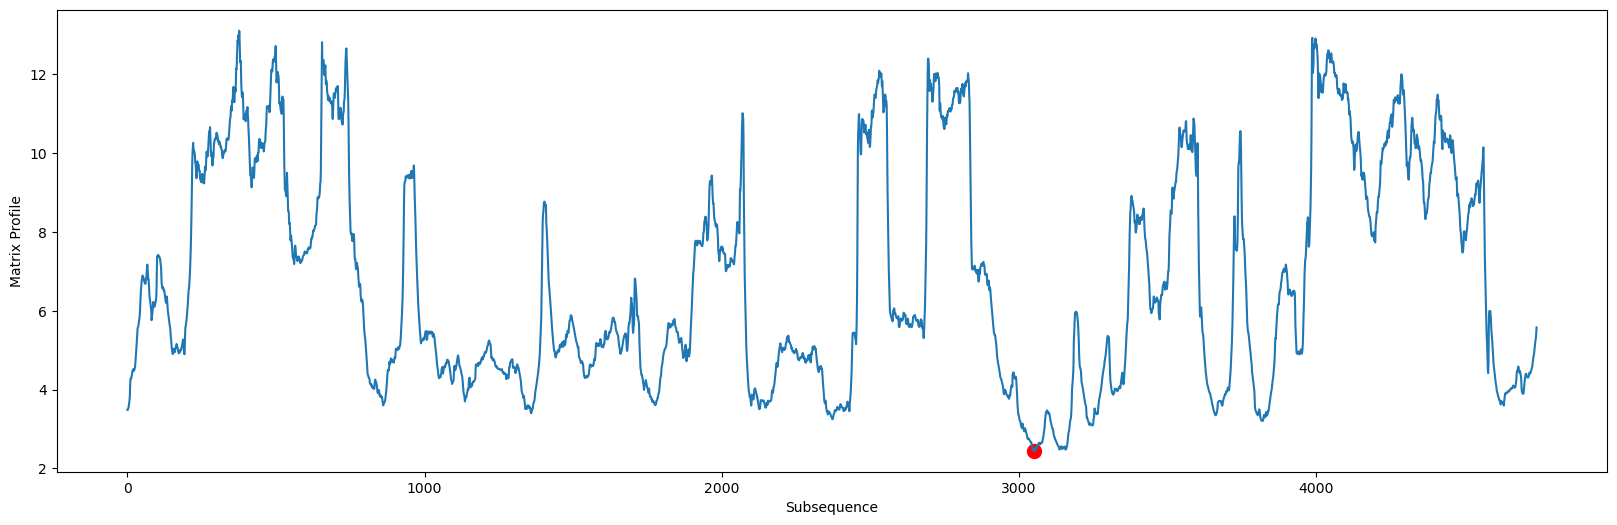

In [20]:
d18caT_motif_index = d18caT_mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(d18caT_motif_index,
               d18caT_mp[d18ca_motif_index, 0],
               c='red',
               s=100)

plt.plot(d18caT_mp[:,0])

In [21]:
# Write matrix profile to external file
pd.DataFrame(d18caT_mp,columns=["MP","I","IL","IR"]).to_csv("join_mp_trim.csv" , sep=",", index=False)

In [22]:
d18_motif_index = d18caT_mp[:, 0].argmin()
print(f'The motif is located at index {d18_motif_index} of "D18"')

The motif is located at index 3051 of "D18"


In [23]:
caT_motif_index = d18caT_mp[d18_motif_index, 1]
print(f'The motif is located at index {caT_motif_index} of "Ca2+"')

The motif is located at index 2551 of "Ca2+"


In [24]:
join_mtf_T=[d18_motif_index,caT_motif_index]
join_mtf_T

[3051, 2551]

In [25]:
d18caS_mp[join_mtf_T]

array([[2.4496574550206547, 3551, -1, -1],
       [11.180339887498949, 0, -1, -1]], dtype=object)

In [26]:
pd.DataFrame(d18caT_mp[join_mtf_T][:,0:2]).to_csv("mtf_join_trim.csv", sep=",", index=False)